In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pylab

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,created_at,description,forks_count,language,open_issues_count,score,size,stargazers_count,type,watchers_count
0,2014-12-24T17:49:19Z,The https://freeCodeCamp.org open source codeb...,20473,JavaScript,9953,1.0,97012,296094,Organization,296094
1,2011-07-29T21:19:00Z,"The most popular HTML, CSS, and JavaScript fra...",63136,CSS,398,1.0,128673,128689,Organization,128689
2,2013-05-24T16:15:54Z,"A declarative, efficient, and flexible JavaScr...",20843,JavaScript,458,1.0,139598,115456,Organization,115456
3,2015-11-07T01:19:20Z,An Open Source Machine Learning Framework for ...,69567,C++,1724,1.0,279474,114415,Organization,114415
4,2013-11-16T02:37:24Z,A book series on JavaScript. @YDKJS on twitter.,17547,NaN,196,1.0,7338,91520,User,91520


In [18]:
df.describe()

,forks_count,open_issues_count,size,stargazers_count,watchers_count,language_id,type_id
count,1020.000000,1020.000000,1.020000e+03,1020.000000,1020.000000,1020.000000,1020.000000
mean,2526.544118,386.557843,1.165367e+05,11289.657843,11289.657843,7.435294,0.215686
std,5313.912135,793.069857,3.472953e+05,14694.489680,14694.489680,8.062606,0.411499
min,119.000000,0.000000,1.400000e+02,3560.000000,3560.000000,0.000000,0.000000
25%,646.500000,50.000000,6.918000e+03,4846.750000,4846.750000,0.000000,0.000000
50%,1258.500000,148.000000,2.682150e+04,7159.000000,7159.000000,6.000000,0.000000
75%,2513.750000,396.000000,9.118325e+04,12066.250000,12066.250000,11.000000,0.000000
max,101326.000000,12869.000000,7.334245e+06,296094.000000,296094.000000,42.000000,1.000000


In [3]:
df = df.drop(['score'], axis=1)

In [4]:
lang_to_int = dict(map(reversed, enumerate(df['language'].unique())))
type_to_int = dict(map(reversed, enumerate(df['type'].unique())))

In [5]:
df['language_id'] = df['language'].map(lang_to_int)
df['type_id'] = df['type'].map(type_to_int)

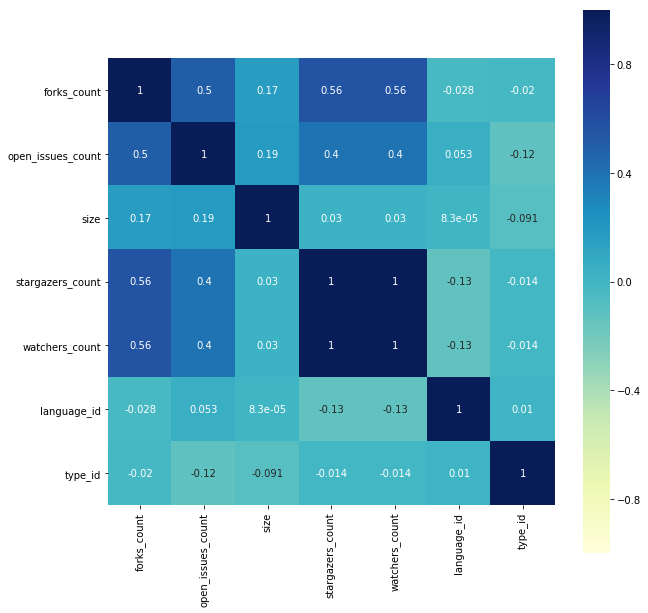

In [6]:
corr_mat = df.corr()

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1,
    cmap="YlGnBu"
)

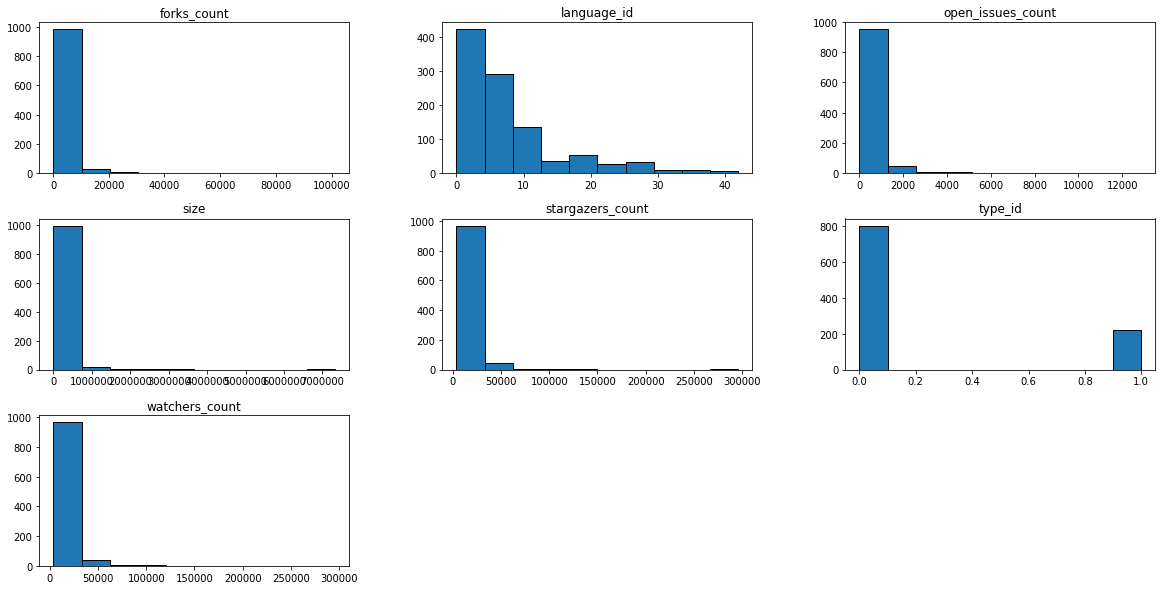

In [7]:
df.hist(edgecolor='black', figsize=(20, 10), grid=False);

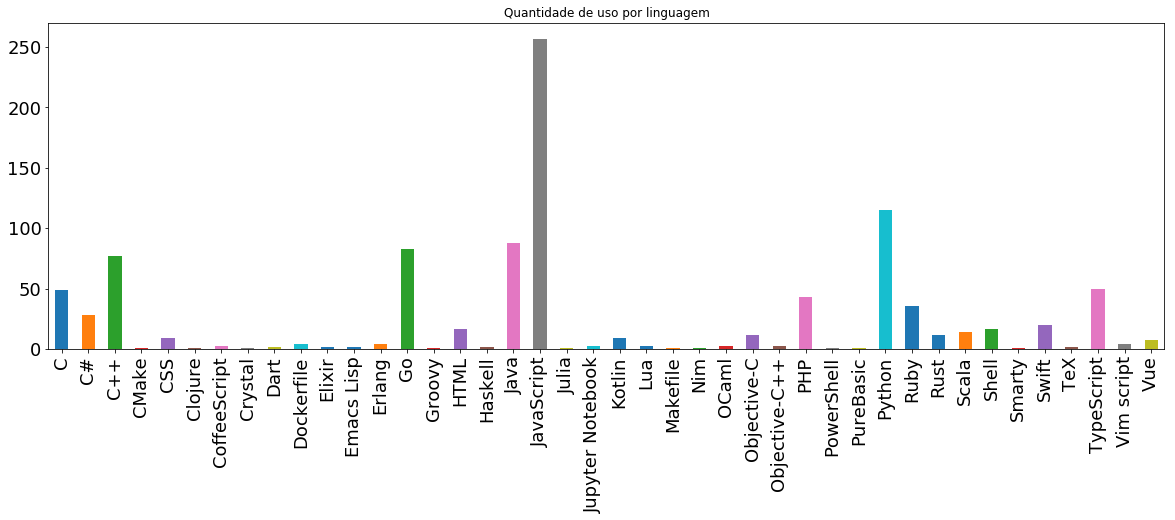

In [8]:
languages = df['language'].value_counts().sort_index()

languages.plot(kind='bar', figsize=(20, 6), fontsize=18,title='Quantidade de uso por linguagem');

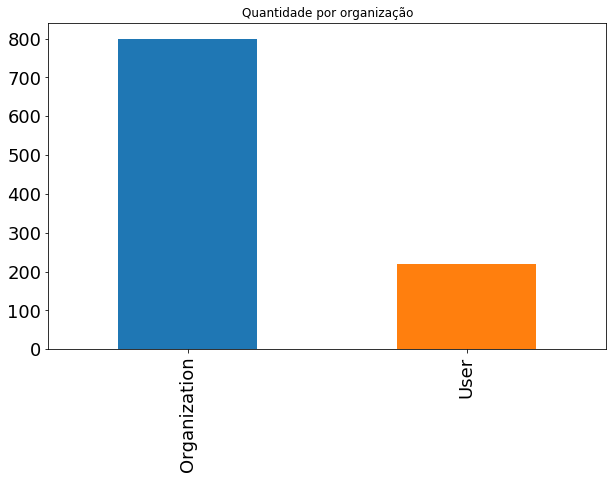

In [9]:
languages = df['type'].value_counts().sort_index()

languages.plot(kind='bar', figsize=(10, 6), fontsize=18,title='Quantidade por organização');

In [10]:
df_values_issues = df.sort_values(by=['open_issues_count'], ascending=False)

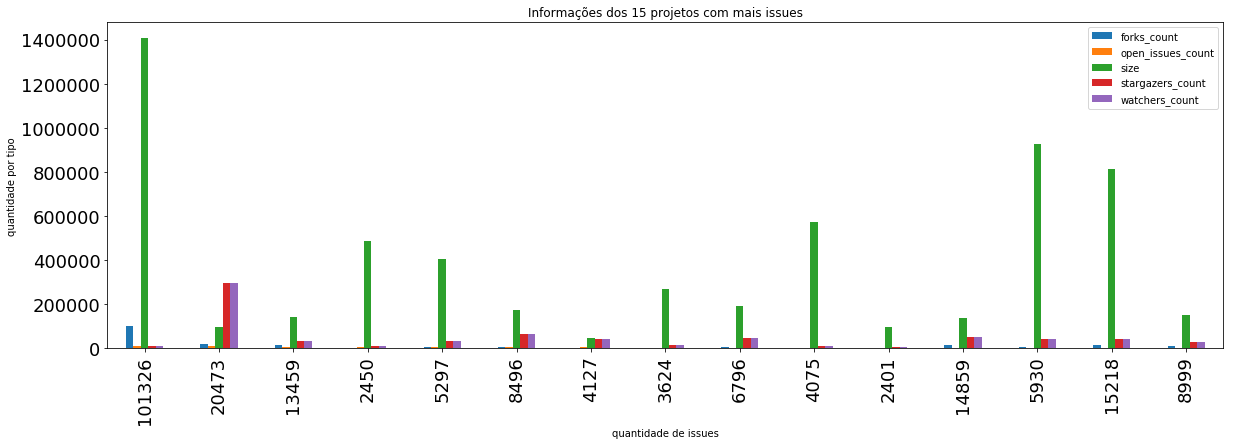

In [11]:
df_issues = df_values_issues.drop(['language_id', 'type_id'], axis=1).head(15)
df_issues.plot(
    kind='bar',
    figsize=(20, 6),
    fontsize=18,
    title='Informações dos 15 projetos com mais issues',
);

plt.xticks(range(len(df_issues)), df_issues['forks_count']);
plt.gca().set(xlabel='quantidade de issues', ylabel='quantidade por tipo');

In [15]:
# Modelo de árvores para feature importance
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    df.drop(['language_id', 'language', 'type', 'description', 'created_at'], axis=1),
    df['language_id']
)

clf.feature_importances_

array([0.22718989, 0.18661637, 0.20515923, 0.17236184, 0.17132942,
       0.03734324])

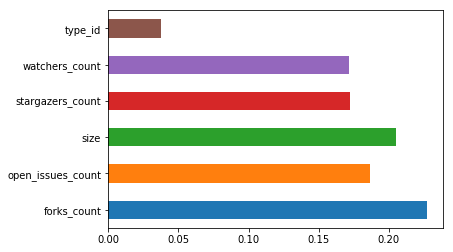

In [17]:
feat_importances = pd.Series(
    clf.feature_importances_, 
    index=df.drop(['language_id', 'language', 'type', 'description', 'created_at'], axis=1).columns
)
feat_importances.plot(kind='barh');